# Holiday Package Purchase Prediction
---

Project conducted by **Widya Ayuningtyas**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




> **Problem Statement**

Travel company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

>  **Objective**

* Predicting which customers are more likely to purchase the new travel package.
* Finding which variables are most significant to taken product to optimize new product campaign.

> **Methodology**

* Univariate Analysis
* Multivariate Analysis
* Tree Based Classifier

> **Included Packages**

* Pandas
* Numpy
* Seaborn
* Matplotlib
* Sklearn

> **Expected Outcome**

* Feature importance
* Best fit model to predict customer's purchase
* Business insight and recommendable action to improve marketing expenditure

> Steps are as following :


## Data Preparation
---




### Installing Packages

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

### Importing Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/dataset/Travel.csv')

## **Data Understanding**
---

Source : The dataset for this project is provided by SUSANT_ACHARY.
[https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction]

Travel Data has 20 features each are grouped into 2 information category below :

1. **Customer**
* ID: Customer's unique identifier
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

2. **Customer Interaction**
* DurationOfPitch: Duration of the pitch by a salesperson to the customer
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* ProductPitched: Product pitched by the salesperson
* PitchSatisfactionScore: Sales pitch satisfaction score

In [4]:
# Checking Entries, Data Shape and Data Attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
data.shape

(4888, 20)

In [6]:
# Check if there are some 'weird' distributed data (numerical)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [7]:
# Check if there are some 'weird' distributed data (categorical)
data.describe(include='O').T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


In [8]:
# Checking unusual gender number of unique (more than 2)
data.Gender.value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [9]:
# Replacing mispelled gender
data.Gender = data.Gender.replace("Fe Male","Female")
data.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

## Exploratory Data Analysis
---

In [10]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Univariate Analysis



> Target Collumn



In [11]:
# Analyzing Target
target = data['ProdTaken'].value_counts().reset_index()
target.rename(columns={'index':'ProdTaken','ProdTaken':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,ProdTaken,freq,percentage
0,0,3968,81.18
1,1,920,18.82


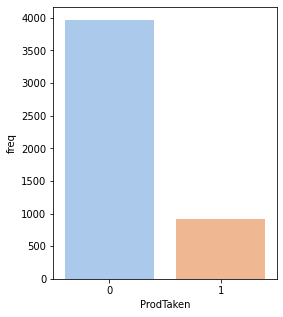

In [12]:
fig, ax = plt.subplots(figsize=(4,5))

sns.set_palette("pastel")
sns.barplot(x = 'ProdTaken',y='freq',data=target,
                ax=ax)



> Categorical Collumns



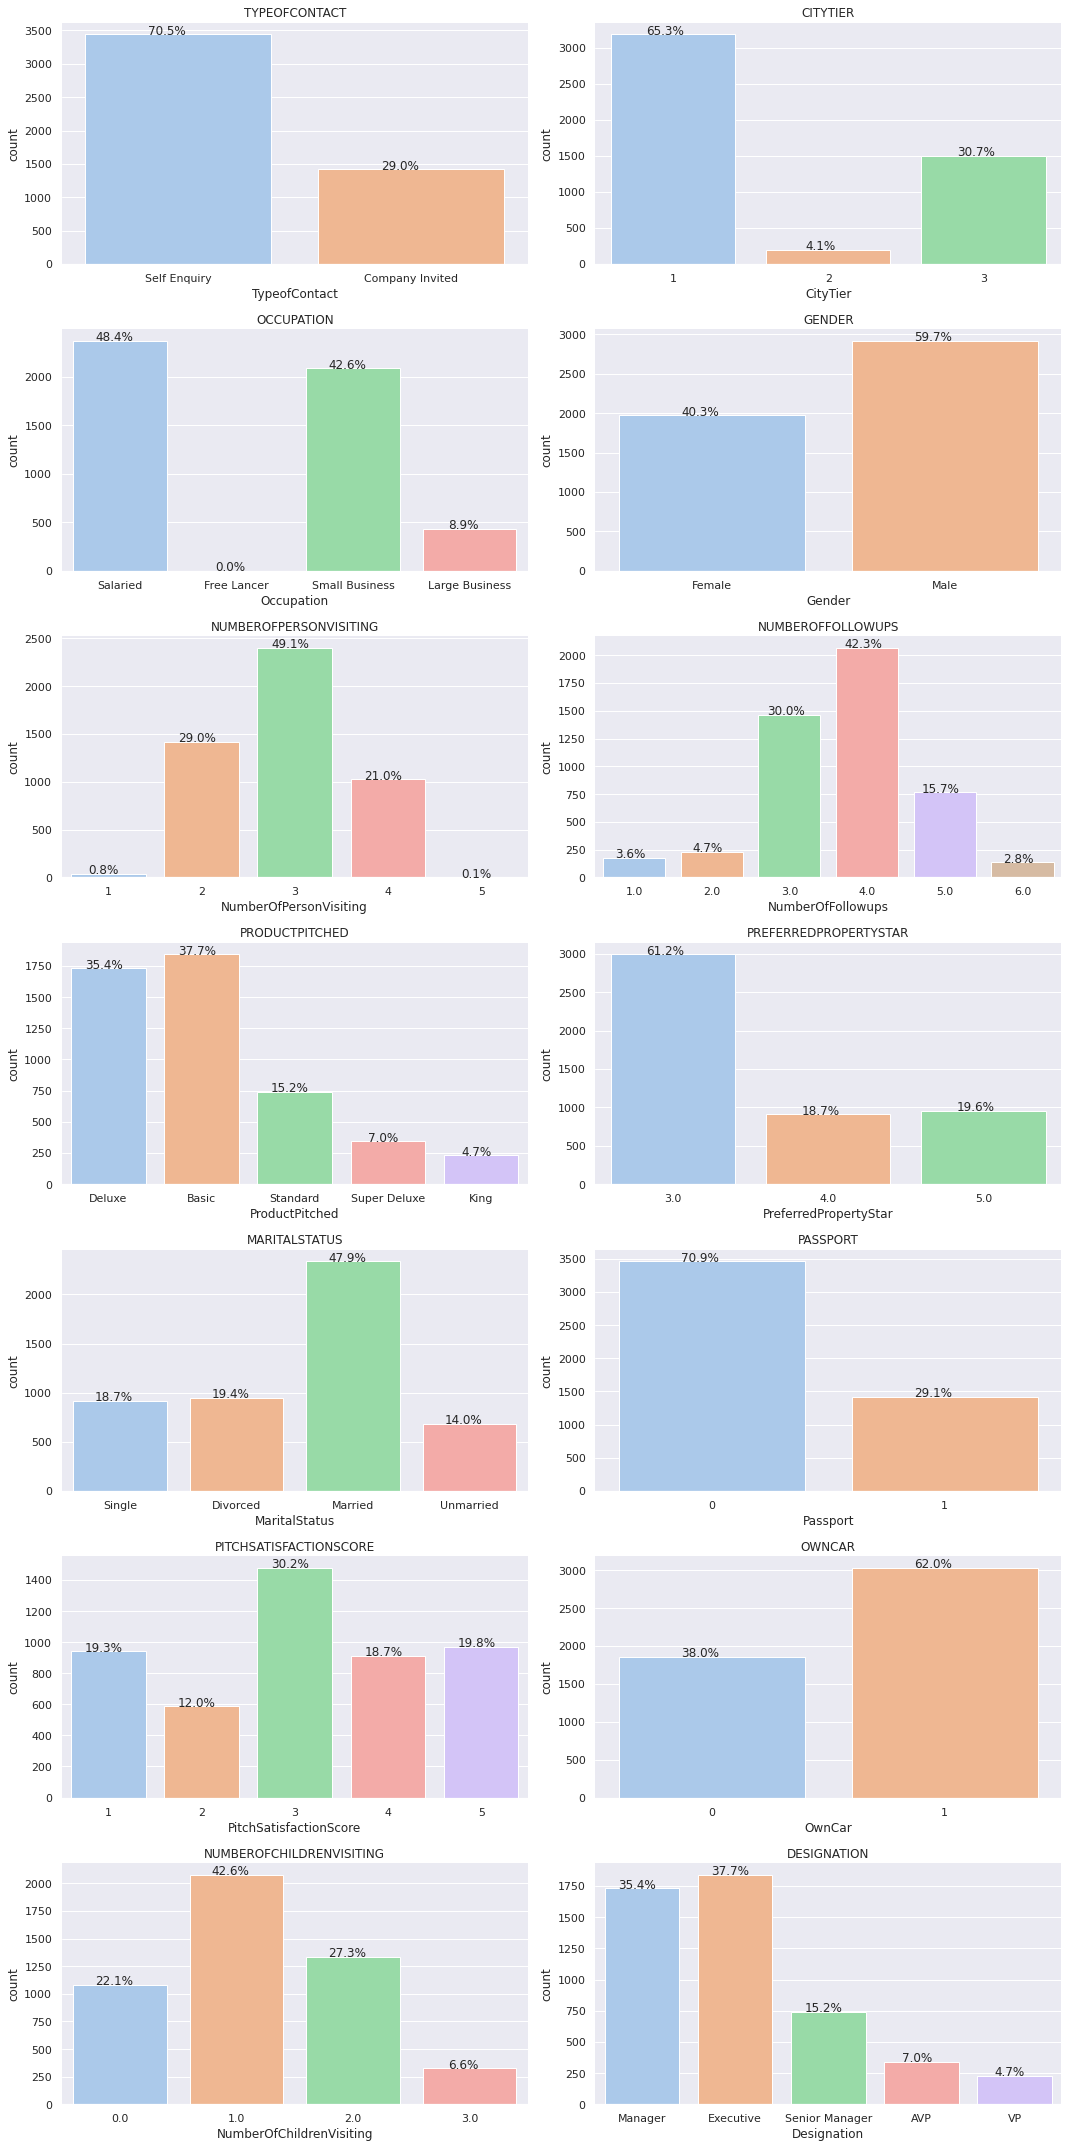

In [13]:
plt.figure(figsize=(15,30))

sns.set_theme(style="darkgrid") 
cat_col=['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 
        'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
        'OwnCar', 'NumberOfChildrenVisiting','Designation']
for a, variable in enumerate(cat_col):
  plt.subplot(7,2,a+1)
  order = data[variable].value_counts(ascending=False).index
  sns.set_palette('pastel')
  ax=sns.countplot(x=data[variable], data=data )
  sns.despine(top=True,right=True,left=True)
  for z in ax.patches:
    percentage = '{:.1f}%'.format(100 * z.get_height()/len(data[variable]))
    x = z.get_x() + z.get_width() / 2 - 0.05
    y = z.get_y() + z.get_height()
    plt.annotate(percentage, (x, y),ha='center')
  plt.tight_layout()
  plt.title(cat_col[a].upper())



> Numerical Collumn



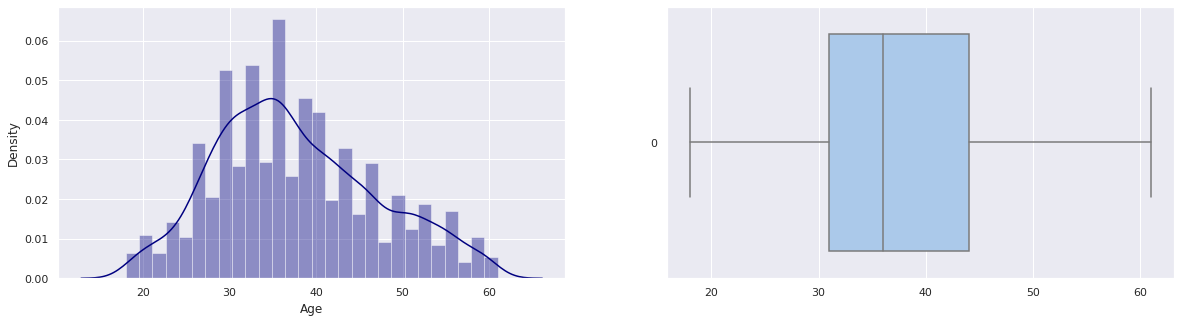

In [14]:
# Boxplot for Age
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(data['Age'],color='navy')

plt.subplot(1,2,2)
sns.boxplot(data = data["Age"], orient="h")

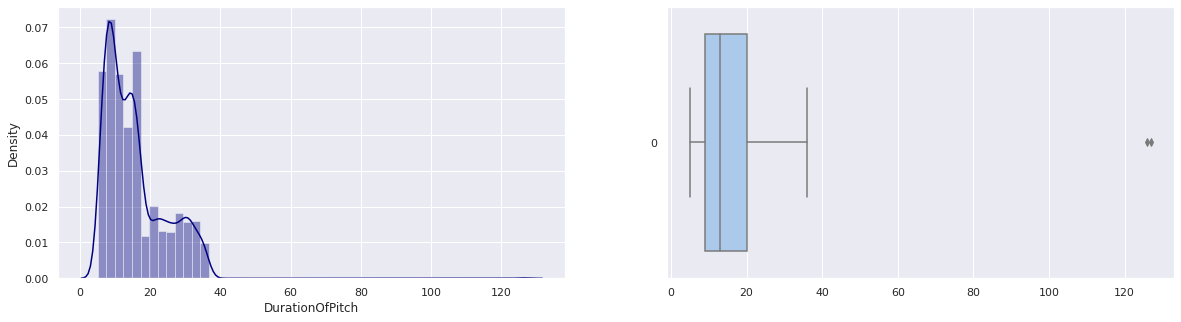

In [15]:
# Boxplot for Duration of Pitch
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(data['DurationOfPitch'],color='navy')

plt.subplot(1,2,2)
sns.boxplot(data = data["DurationOfPitch"], orient="h")

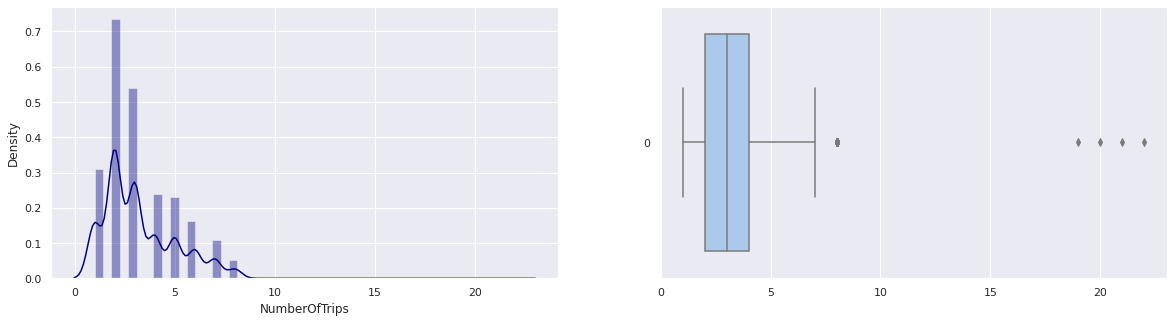

In [16]:
# Boxplot for Number of Trips
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(data['NumberOfTrips'],color='navy')

plt.subplot(1,2,2)
sns.boxplot(data = data["NumberOfTrips"], orient="h")

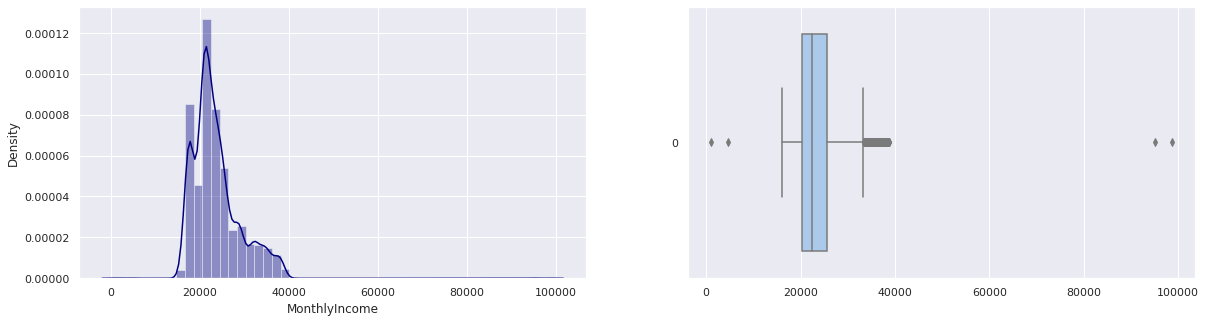

In [17]:
# Boxplot for Monthly Income
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(data['MonthlyIncome'],color='navy')

plt.subplot(1,2,2)
sns.boxplot(data = data["MonthlyIncome"], orient="h")

### Multivariate Analysis

Categorical

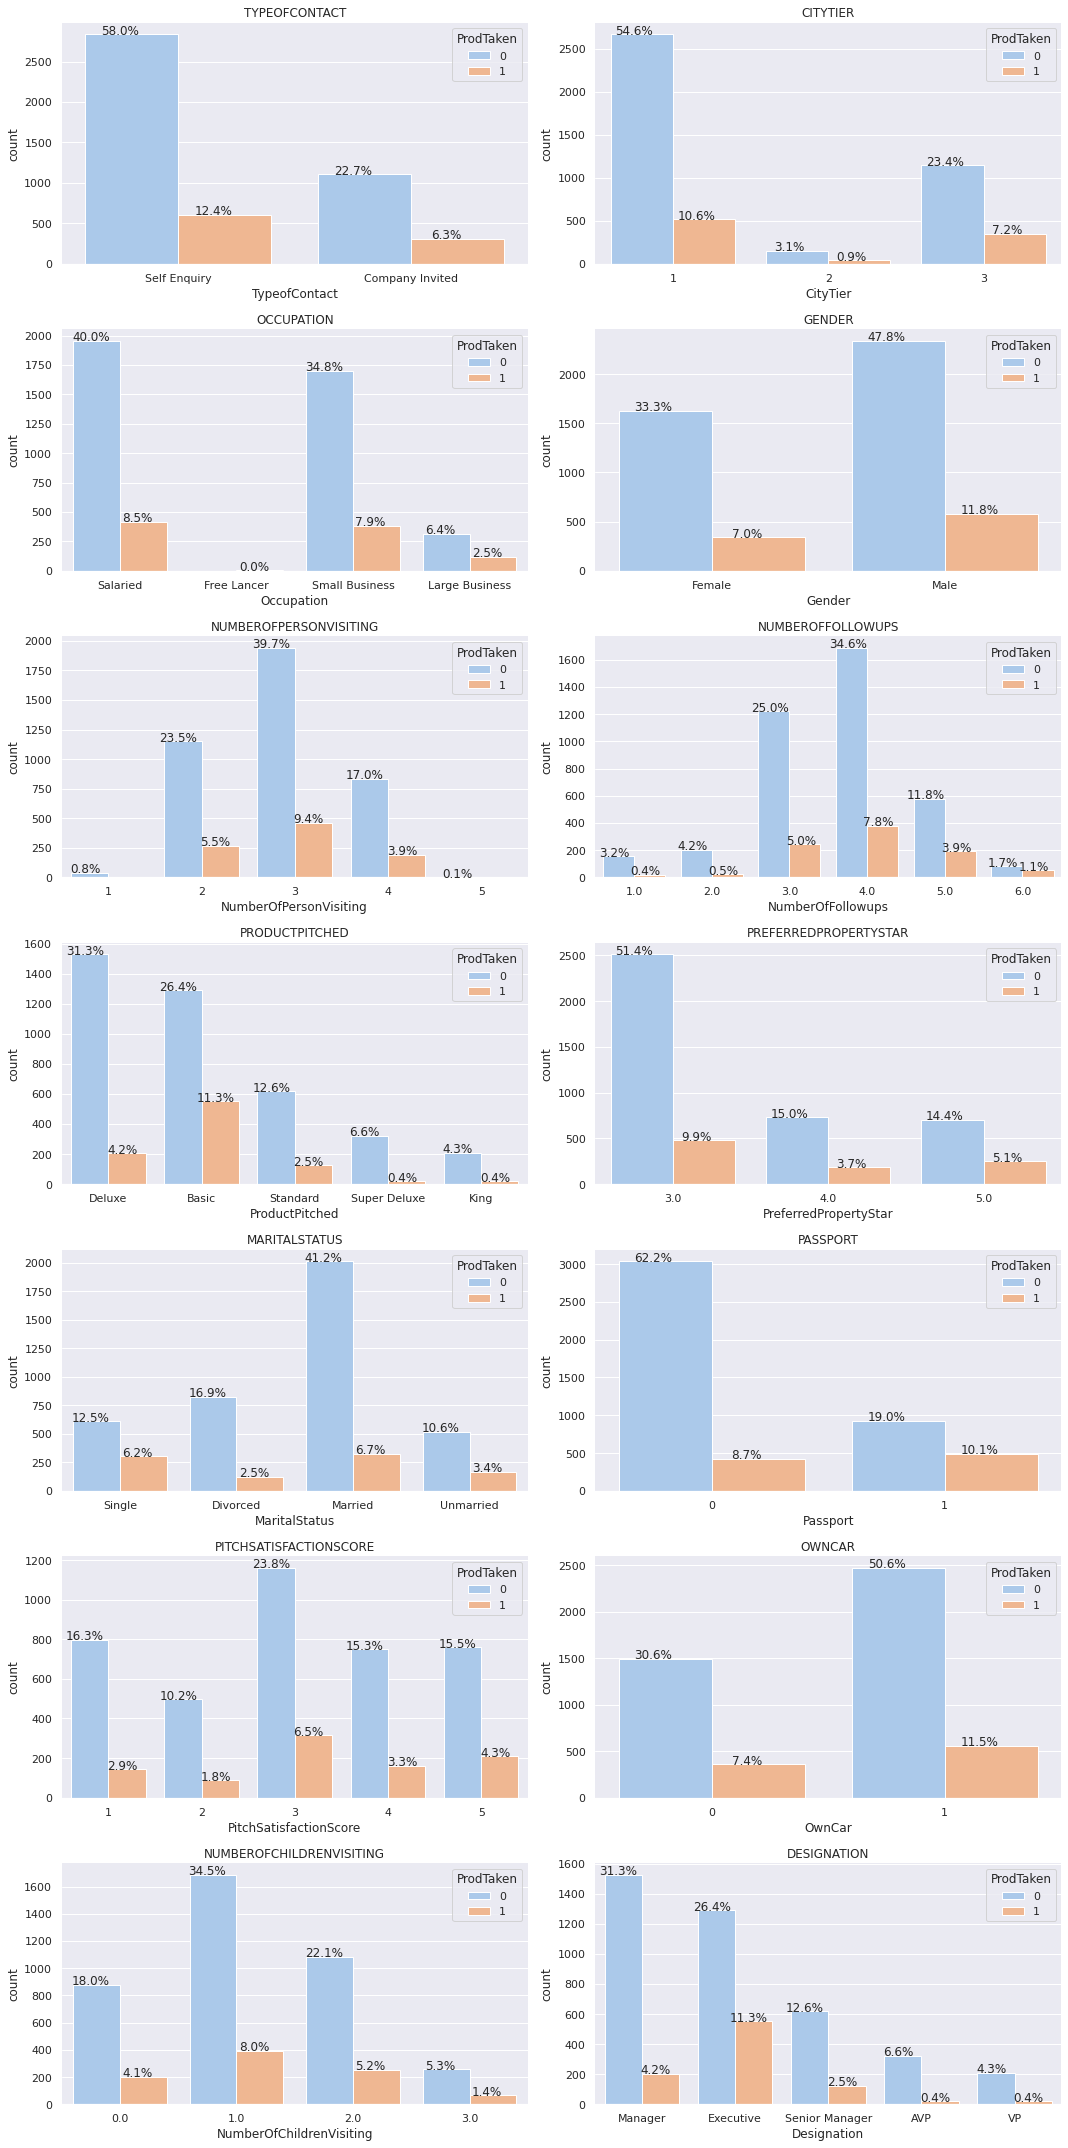

In [18]:
plt.figure(figsize=(15,30))

sns.set_theme(style="darkgrid") 
cat_col=['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 
        'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
        'OwnCar', 'NumberOfChildrenVisiting','Designation']
for a, variable in enumerate(cat_col):
  plt.subplot(7,2,a+1)
  order = data[variable].value_counts(ascending=False).index
  sns.set_palette('pastel')
  ax=sns.countplot(x=data[variable], data=data, hue='ProdTaken')
  sns.despine(top=True,right=True,left=True)
  for z in ax.patches:
    percentage = '{:.1f}%'.format(100 * z.get_height()/len(data[variable]))
    x = z.get_x() + z.get_width() / 2 - 0.05
    y = z.get_y() + z.get_height()
    plt.annotate(percentage, (x, y),ha='center')
  plt.tight_layout()
  plt.title(cat_col[a].upper())

Numerical

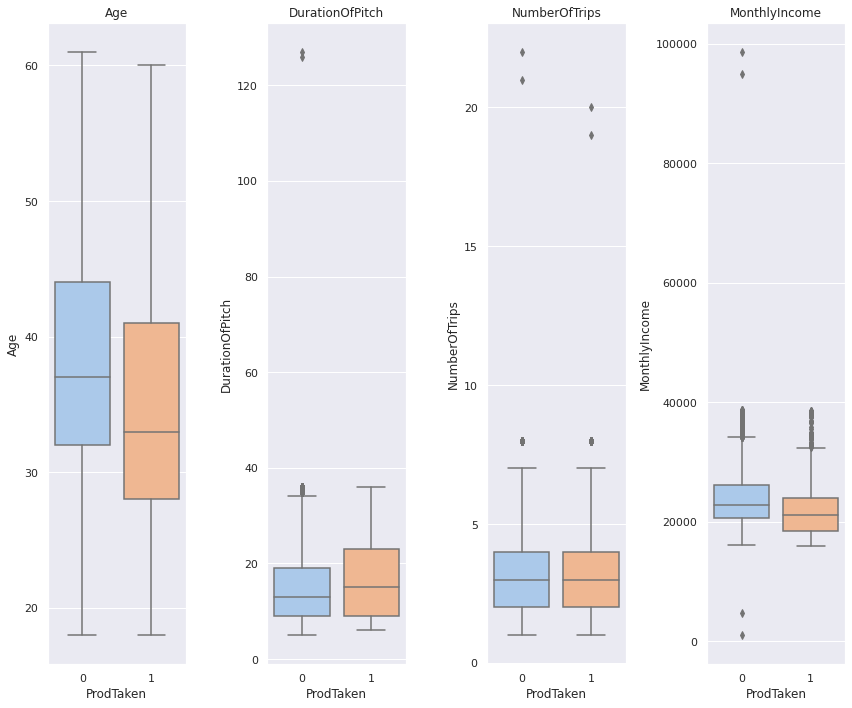

In [19]:
# for all numerical variables with Personal_Loan draw box plots
num_col = ['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']

plt.figure(figsize=(12,10))
for a, variable in enumerate(num_col):
  plt.subplot(1,4,a+1)
  sns.boxplot(data["ProdTaken"],data[variable],palette="pastel")
  plt.tight_layout()
  plt.title(variable)
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

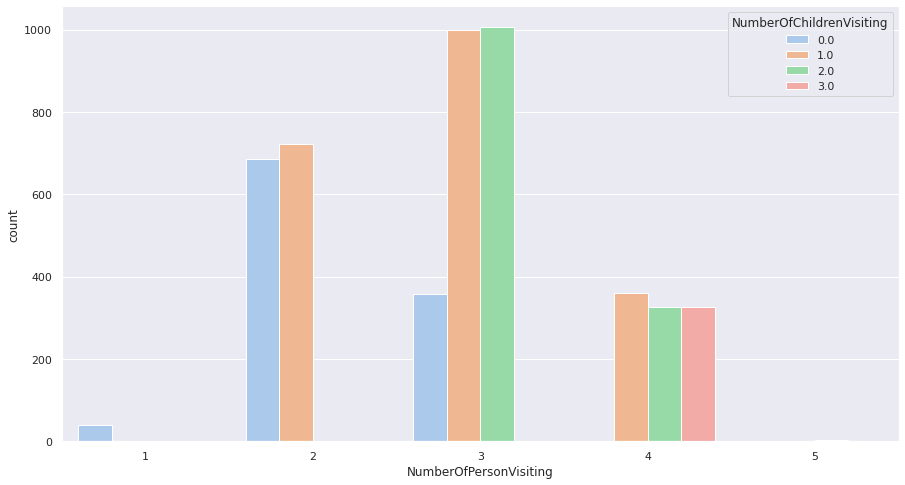

In [22]:
fig, ax = plt.subplots(figsize=(15,8))

sns.countplot(data=data,
            x='NumberOfPersonVisiting',
            hue='NumberOfChildrenVisiting')

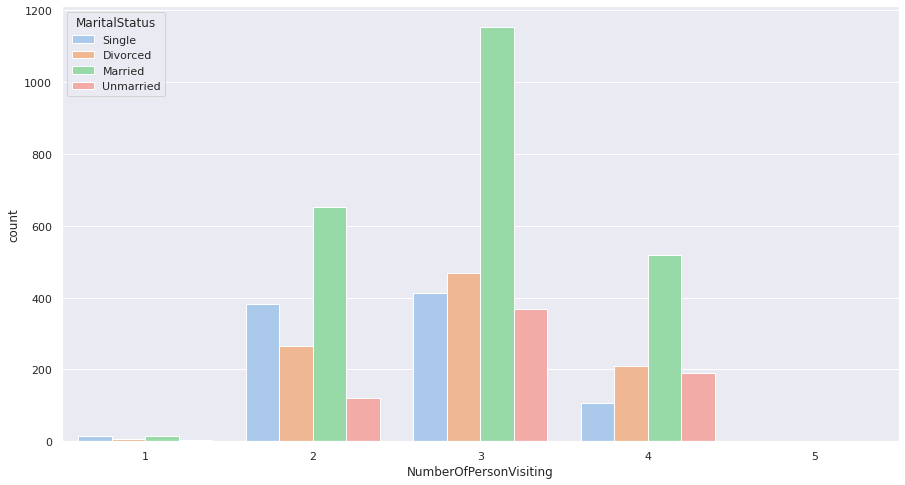

In [25]:
fig, ax = plt.subplots(figsize=(15,8))

sns.countplot(data=data,
            x='NumberOfPersonVisiting',
            hue='MaritalStatus')

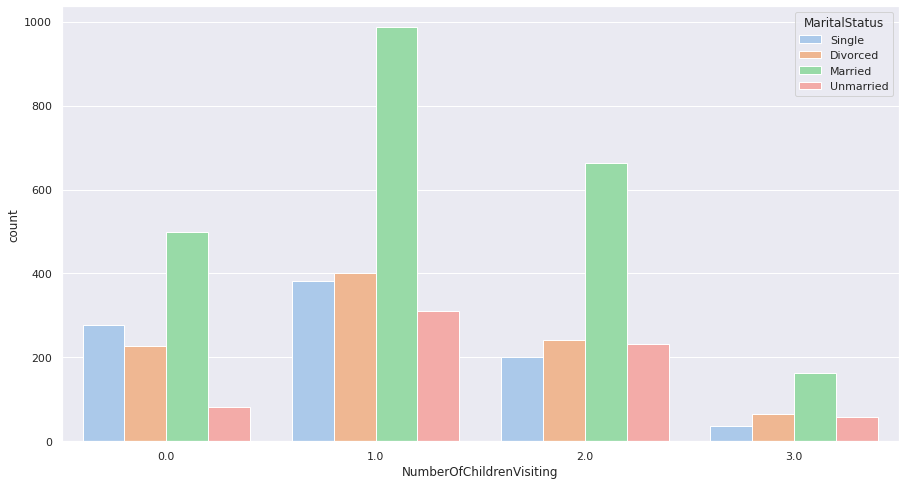

In [29]:
fig, ax = plt.subplots(figsize=(15,8))

sns.countplot(data=data,
            x='NumberOfChildrenVisiting',
            hue='MaritalStatus')

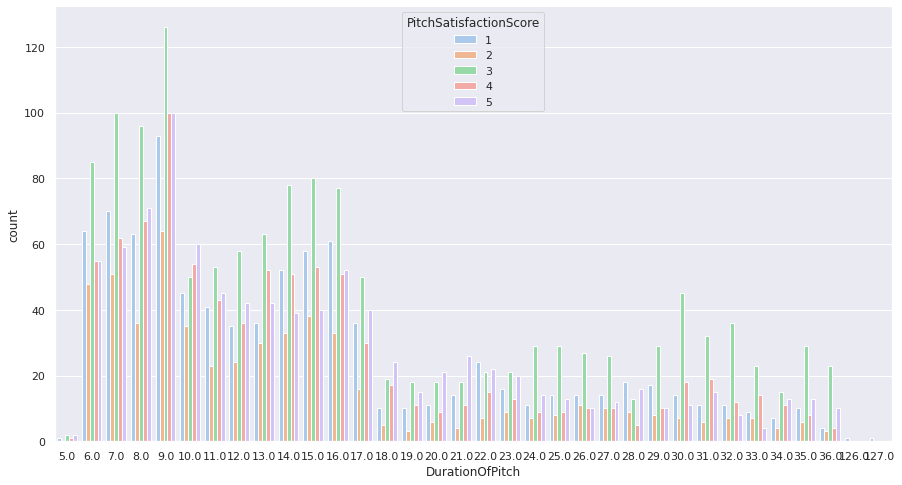

In [28]:
fig, ax = plt.subplots(figsize=(15,8))

sns.countplot(data=data,
            x='DurationOfPitch',
            hue='PitchSatisfactionScore')

duration should be grouped for better view of analysis
a lot of score 3 

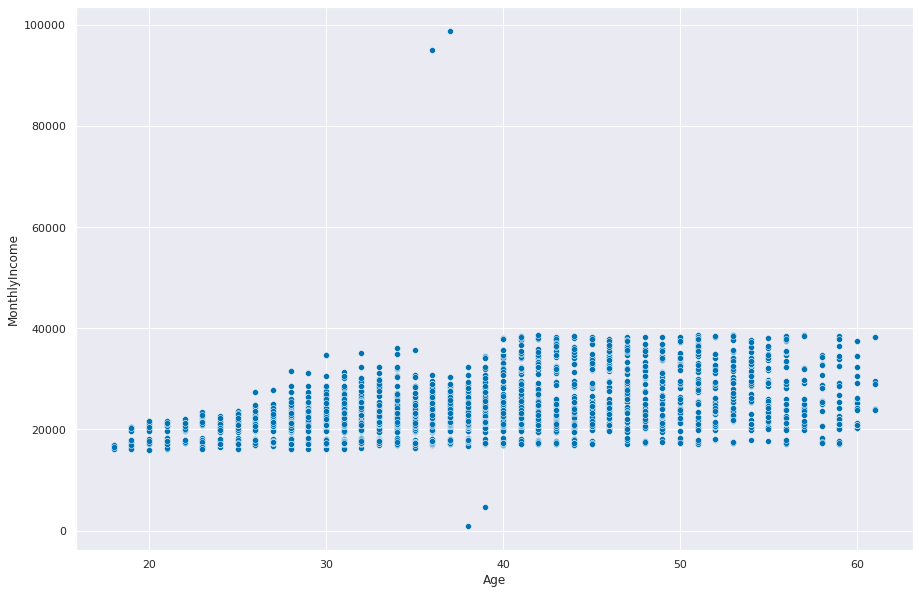

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=data, x='Age', y='MonthlyIncome')

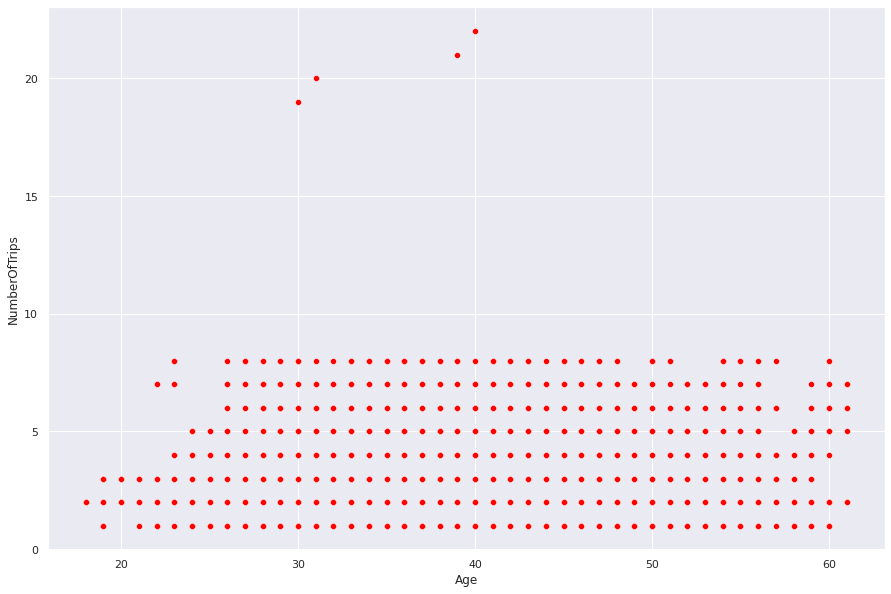

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=data, x='Age', y='NumberOfTrips', color = 'red')

### Multicollinearity



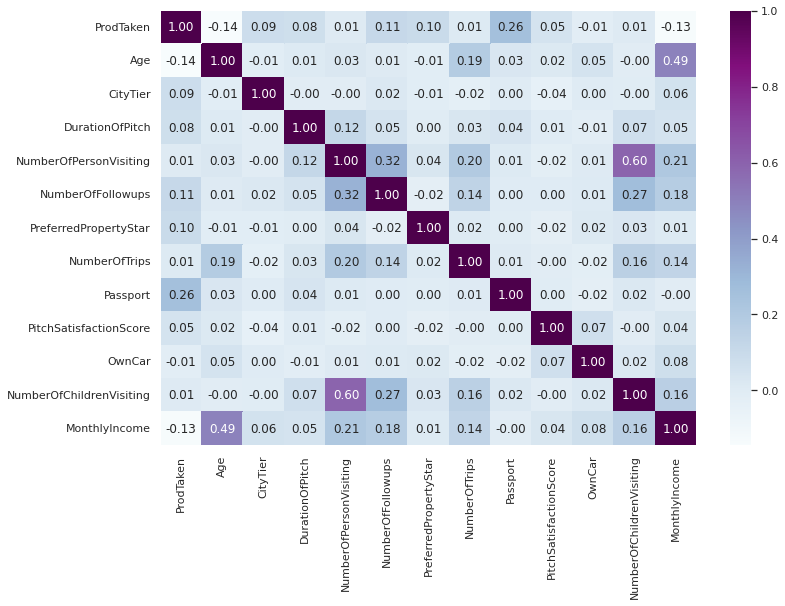

In [ ]:
corr = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt = '.2f', cmap = 'BuPu')

## Data Preprocessing
---

In [ ]:
# Menghapus kolom ID
data = data.drop(['CustomerID'],axis=1)

In [ ]:
# selecting all object datatypes and converting to category
cols = data.select_dtypes(["object"])
for i in cols.columns:
    data[i] = data[i].astype("category")

# check the dataset for updated datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   int64 

### Missing Values

In [ ]:
# Checking percentage of Missing Values each Attributes
pct_null = data.isnull().sum() / len(data) * 100
pct_null

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

**There are 8 columns with null values**
* Age, MonthlyIncome : are highly correlated with monthly income, and monthlyincome are depending on designation of occupation, so we will impute missing values by median with designation as a basis.
* TypeOfContact : since Self Inquiry occuring the most, so we will impute missing values with Self Inquiry
* DurationOfPitch : it could be there are no pitching done so we will impute missing values with 0
* NumberOfFollowups, PrefferedPropertyStar : will be imputed by median values of the collumn
* NumberofTrip : have correlation with age so we will impute this by median with designation as a basis
* NumberOfChildrenVisiting : the cause of missing values are probably because there are no children visiting so we will impute missing values with 0


In [ ]:
# Handling Missing Values from collumn Age, NumberOfTrips, and MonthlyIncome
data["Age"] = data.groupby(["Designation"])["Age"].transform(lambda x: x.fillna(x.median()))
data["NumberOfTrips"] = data.groupby(["Designation"])["NumberOfTrips"].transform(lambda x: x.fillna(x.median()))
data["MonthlyIncome"] = data.groupby(["Designation"])["MonthlyIncome"].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Handling TypeOfContact missing values
data['TypeofContact'] = data['TypeofContact'].fillna('Self Enquiry')

In [ ]:
# Handling Missing Values from collumn DurationOfPitch and NumberOfChildrenVisiting
data['DurationOfPitch'] = data['DurationOfPitch'].fillna(0)
data['NumberOfChildrenVisiting'] = data['NumberOfChildrenVisiting'].fillna(0)

In [ ]:
# Handling Missing Values from collumn NumberOfFollowups and PrefferedPropertyStar
data['NumberOfFollowups'] = data['NumberOfFollowups'].fillna(data.NumberOfFollowups.median())
data['PreferredPropertyStar'] = data['PreferredPropertyStar'].fillna(data.NumberOfFollowups.median())

In [ ]:
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Outlier Handling



> Detecting Outlier



Text(0.5, 1.0, 'MonthlyIncome')

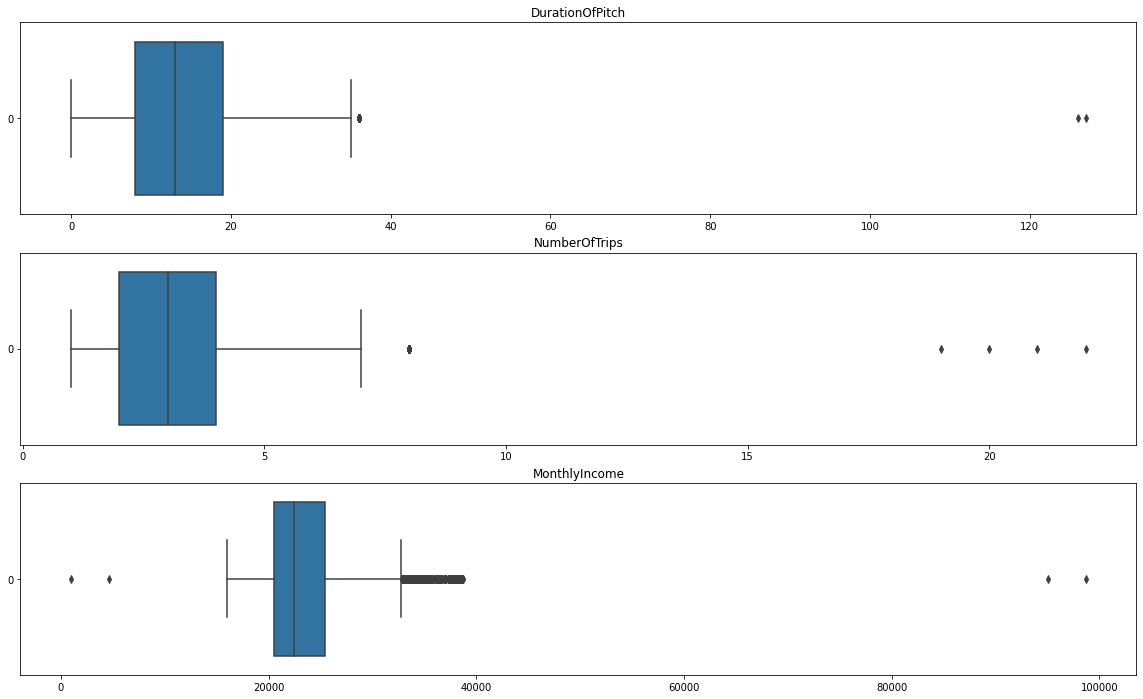

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(3,1,1)
sns.boxplot(data = data["DurationOfPitch"], orient="h")
plt.title('DurationOfPitch')

plt.subplot(3,1,2)
sns.boxplot(data = data["NumberOfTrips"], orient="h")
plt.title('NumberOfTrips')

plt.subplot(3,1,3)
sns.boxplot(data = data["MonthlyIncome"], orient="h")
plt.title('MonthlyIncome')

In [ ]:
data[(data.DurationOfPitch>36)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,0,32.0,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


In [ ]:
data[(data.NumberOfTrips>8)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


In [ ]:
# Setting IQR Bound for Outlier MonthlyIncome
Q1 = data['MonthlyIncome'].quantile(0.25)             
Q3 = data['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1                           
lower=Q1-1.5*IQR                        
upper=Q3+1.5*IQR
lower, upper

(13075.375, 32834.375)

In [ ]:
data[(data.MonthlyIncome<13000) | (data.MonthlyIncome>40000)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,4.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0




> Removing Outlier



In [ ]:
#Dropping entries with duration of pitch greater than 36 (2 entries)
data.drop(index=data[data.DurationOfPitch>36].index,inplace=True)

#Dropping entries with number of trips greater than 8 (4 entries)
data.drop(index=data[data.NumberOfTrips>8].index,inplace=True)

#Dropping entries with monthly income less than 13000 or greater than 40000 (4 entries)
data.drop(index=data[(data.MonthlyIncome<13000) | (data.MonthlyIncome>40000)].index,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4878 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4878 non-null   int64   
 1   Age                       4878 non-null   float64 
 2   TypeofContact             4878 non-null   category
 3   CityTier                  4878 non-null   int64   
 4   DurationOfPitch           4878 non-null   float64 
 5   Occupation                4878 non-null   category
 6   Gender                    4878 non-null   category
 7   NumberOfPersonVisiting    4878 non-null   int64   
 8   NumberOfFollowups         4878 non-null   float64 
 9   ProductPitched            4878 non-null   category
 10  PreferredPropertyStar     4878 non-null   float64 
 11  MaritalStatus             4878 non-null   category
 12  NumberOfTrips             4878 non-null   float64 
 13  Passport                  4878 non-null   int64 

### Encoding

In [ ]:
df = pd.get_dummies(data=data,columns=['TypeofContact','Occupation', 'Gender', 'ProductPitched',
                                      'MaritalStatus','Designation'],drop_first=True)
df.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,0,1,0,0,1,0,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,0,0,0,0,0,0,0,1,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,0,1,0,1,0,0,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,0,0,0,0,0,1,0,0,0
4,0,32.0,1,8.0,2,3.0,4.0,1.0,0,5,...,0,0,0,0,0,0,1,0,0,0


## Modelling
---

In [ ]:
target

,ProdTaken,freq,percentage
0,0,3960,81.18
1,1,918,18.82


### Metric Used

F1-Score : to minimize false positive and false negative

AUC : metric for imbalanced dataset

### Split Data

In [ ]:
# split data
X = df.drop(columns='ProdTaken')
y = df[['ProdTaken']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12, stratify=y)

# creating a list of column names
attributes = X_train.columns.to_list()

### Decission Tree

In [ ]:
#Decision Tree Modelling
dt = DecisionTreeClassifier(class_weight='balanced', random_state=12)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

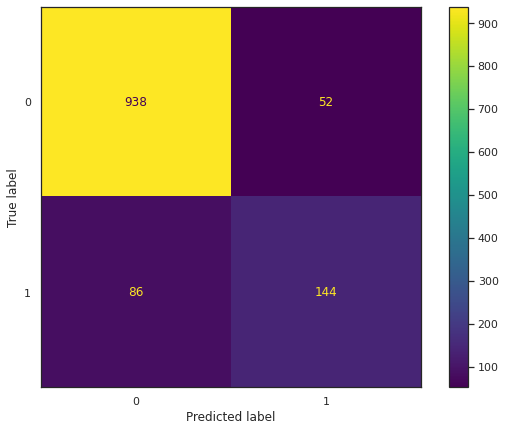

In [ ]:
# Confusion Matrix

fig, ax = plt.subplots(figsize=(10,7))

sns.set_theme(style="white") 
cm_dt = confusion_matrix(y_test, dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot(ax=ax)
plt.show()

In [ ]:
# check the scores on Training and Testing Datasets
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       990
           1       0.73      0.63      0.68       230

    accuracy                           0.89      1220
   macro avg       0.83      0.79      0.80      1220
weighted avg       0.88      0.89      0.88      1220



In [ ]:
print(roc_auc_score(y_test, dt_pred))

0.7867808519982433


In [ ]:
%%time
# Hyperparameter Tuning
parameters = {
    'max_depth':(1,2,3,4,5,6,7,8,9,10),
    'max_leaf_nodes':(10,20,30,40,50)
    }

# Note : use recall
dt_gridcv = GridSearchCV(dt, parameters, cv=8, scoring='recall')
dt_gridcv.fit(X_train, y_train)

CPU times: user 6.62 s, sys: 3.41 ms, total: 6.62 s
Wall time: 6.6 s


In [ ]:
# Results
dttune_result = pd.DataFrame(dt_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
dttune_result[retain_cols].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
48,"{'max_depth': 10, 'max_leaf_nodes': 40}",0.771802,1
43,"{'max_depth': 9, 'max_leaf_nodes': 40}",0.767442,2
49,"{'max_depth': 10, 'max_leaf_nodes': 50}",0.765988,3
44,"{'max_depth': 9, 'max_leaf_nodes': 50}",0.761628,4
47,"{'max_depth': 10, 'max_leaf_nodes': 30}",0.757267,5


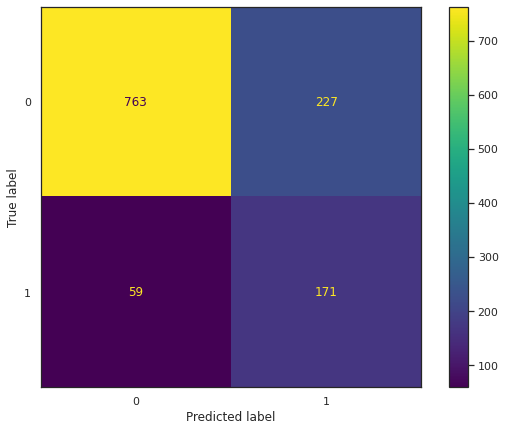

In [ ]:
# Confusion Matrix

fig, ax = plt.subplots(figsize=(10,7))
dt_tune_pred = dt_gridcv.best_estimator_.predict(X_test)

cm_dtt = confusion_matrix(y_test, dt_tune_pred, labels=dt_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtt,
                             display_labels=dt_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
dt_tune_pred = dt_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, dt_tune_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       990
           1       0.43      0.74      0.54       230

    accuracy                           0.77      1220
   macro avg       0.68      0.76      0.69      1220
weighted avg       0.83      0.77      0.79      1220



In [ ]:
print(roc_auc_score(y_test, dt_tune_pred))

0.7570926657883179


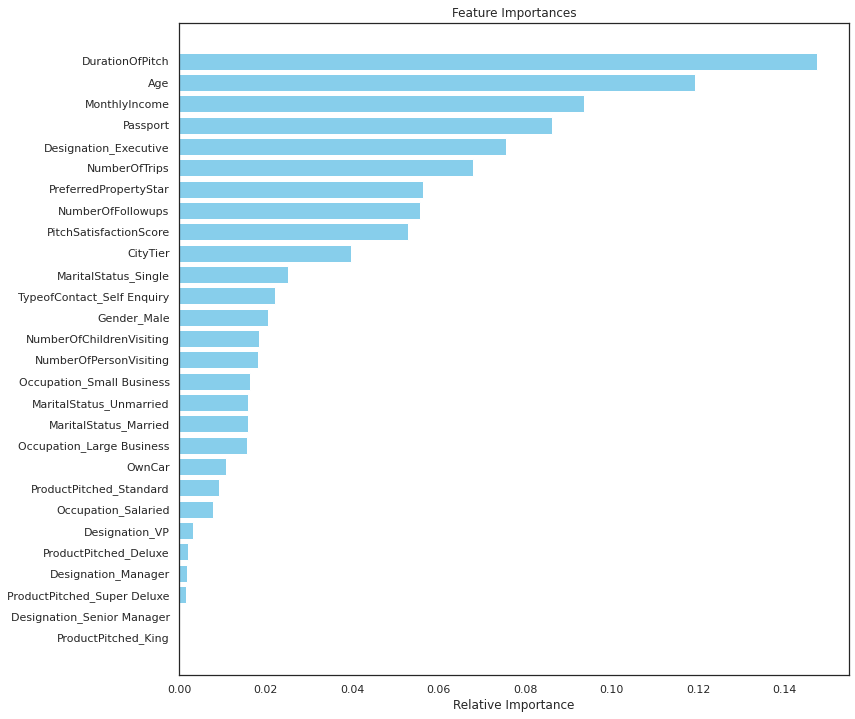

In [ ]:
# Feature Importance
importances_dt = dt.feature_importances_
indices = np.argsort(importances_dt)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances_dt[indices], color="skyblue", align="center")
plt.yticks(range(len(indices)), [attributes[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Random Forest

In [ ]:
#Random Forest Modelling
rf = RandomForestClassifier(class_weight='balanced_subsample',random_state=12)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

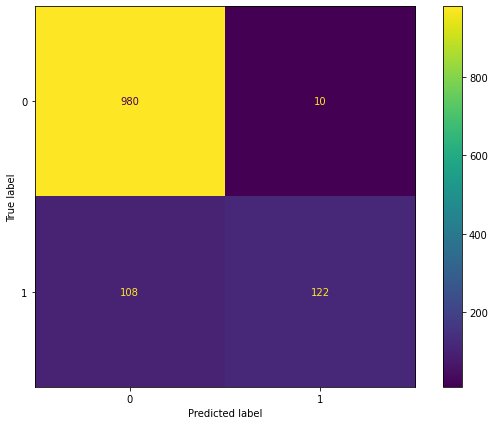

In [ ]:
# Confusion Matrix

fig, ax = plt.subplots(figsize=(10,7))

cm_rf = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(ax=ax)
plt.show()

In [ ]:
# check the scores on Training and Testing Datasets
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       990
           1       0.92      0.53      0.67       230

    accuracy                           0.90      1220
   macro avg       0.91      0.76      0.81      1220
weighted avg       0.91      0.90      0.89      1220



In [ ]:
print(roc_auc_score(y_test, rf_pred))

0.7601668862538429


> Hyperparameter Tuning



In [ ]:
%%time
# Hyperparameter Tuning
parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
    }

# Note : use recall
rf_gridcv = GridSearchCV(rf, parameters, cv=8, scoring='recall')
rf_gridcv.fit(X_train, y_train)


CPU times: user 24 s, sys: 0 ns, total: 24 s
Wall time: 25.9 s


In [ ]:
# Results
rftune_result = pd.DataFrame(rf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
rftune_result[retain_cols].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
22,"{'max_depth': 5, 'n_estimators': 30}",0.670058,1
21,"{'max_depth': 5, 'n_estimators': 20}",0.667151,2
23,"{'max_depth': 5, 'n_estimators': 40}",0.662791,3
16,"{'max_depth': 4, 'n_estimators': 20}",0.662791,4
20,"{'max_depth': 5, 'n_estimators': 10}",0.659884,5


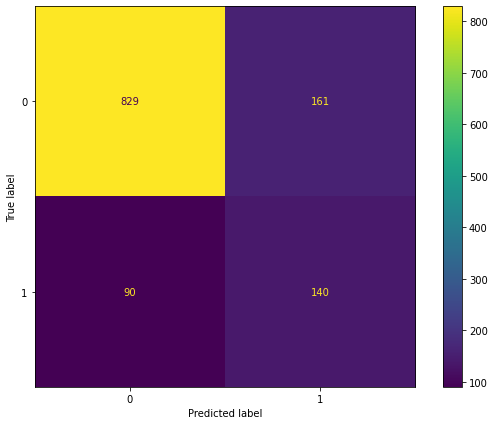

In [ ]:
# Confusion Matrix

fig, ax = plt.subplots(figsize=(10,7))
rf_tune_pred = rf_gridcv.best_estimator_.predict(X_test)

cm_rft = confusion_matrix(y_test, rf_tune_pred, labels=rf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rft,
                             display_labels=rf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
rf_tune_pred = rf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, rf_tune_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       990
           1       0.47      0.61      0.53       230

    accuracy                           0.79      1220
   macro avg       0.68      0.72      0.70      1220
weighted avg       0.82      0.79      0.80      1220



In [ ]:
print(roc_auc_score(y_test, rf_tune_pred))

0.7230346947738252




> Feature Importance



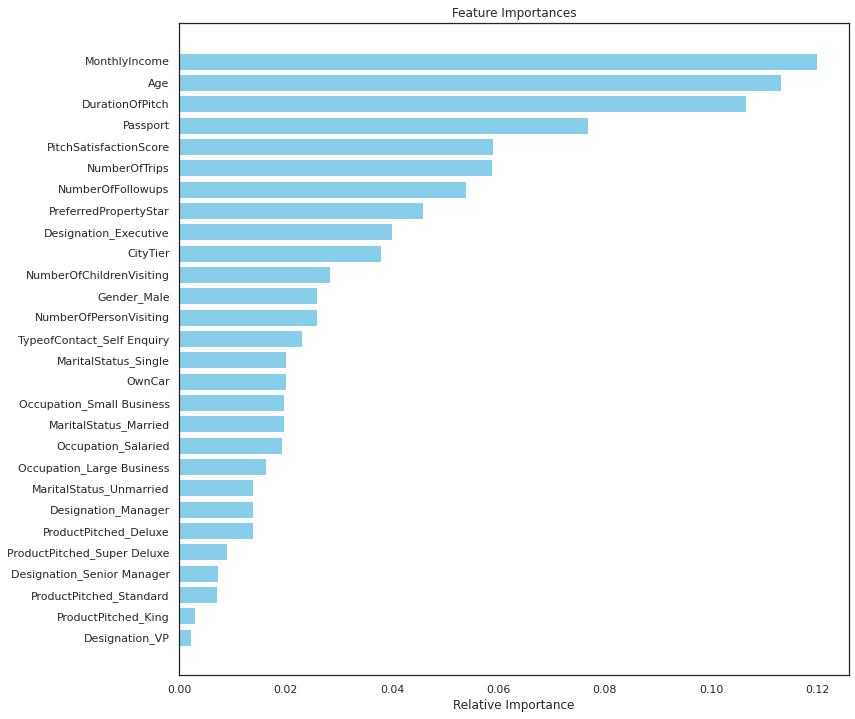

In [ ]:
# Feature Importance
importances_rf = rf.feature_importances_
indices = np.argsort(importances_rf)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances_rf[indices], color="skyblue", align="center")
plt.yticks(range(len(indices)), [attributes[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Gradient Boosting

In [ ]:
#Gradient Boosting Modelling
gb = GradientBoostingClassifier(random_state=12)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

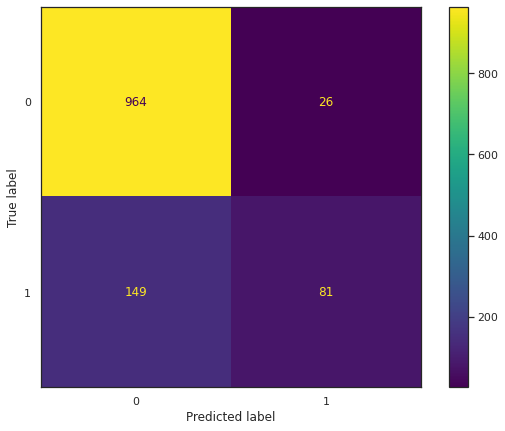

In [ ]:
# Confusion Matrix

fig, ax = plt.subplots(figsize=(10,7))

cm_gb = confusion_matrix(y_test, gb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp.plot(ax=ax)
plt.show()

In [ ]:
# check the scores on Training and Testing Datasets
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       990
           1       0.76      0.35      0.48       230

    accuracy                           0.86      1220
   macro avg       0.81      0.66      0.70      1220
weighted avg       0.85      0.86      0.83      1220



In [ ]:
print(roc_auc_score(y_test, gb_pred))

0.662955643390426


In [ ]:
%%time
# Hyperparameter Tuning
parameters = {
    "n_estimators": (10,20,30,40,50),
    "max_features":[0.6,0.7,0.8],
    "learning_rate": [0.05,0.15,0.5]
    }

# Note : use recall
gb_gridcv = GridSearchCV(gb, parameters, cv=8, scoring='recall')
gb_gridcv.fit(X_train, y_train)

CPU times: user 49.1 s, sys: 0 ns, total: 49.1 s
Wall time: 49.8 s


In [ ]:
# Results
gbtune_result = pd.DataFrame(gb_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
gbtune_result[retain_cols].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
44,"{'learning_rate': 0.5, 'max_features': 0.8, 'n...",0.510174,1
39,"{'learning_rate': 0.5, 'max_features': 0.7, 'n...",0.495640,2
34,"{'learning_rate': 0.5, 'max_features': 0.6, 'n...",0.484012,3
43,"{'learning_rate': 0.5, 'max_features': 0.8, 'n...",0.481105,4
38,"{'learning_rate': 0.5, 'max_features': 0.7, 'n...",0.470930,5


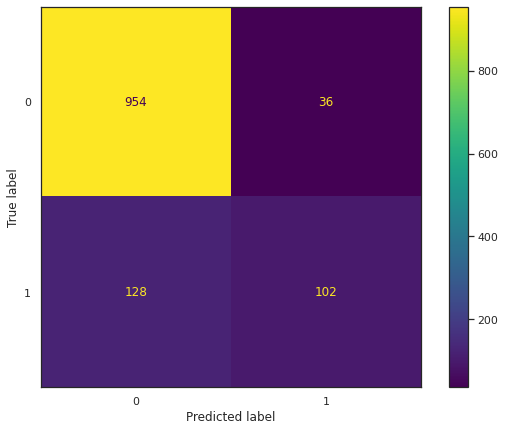

In [ ]:
# Confusion Matrix

fig, ax = plt.subplots(figsize=(10,7))
gb_tune_pred = gb_gridcv.best_estimator_.predict(X_test)

cm_gbt = confusion_matrix(y_test, gb_tune_pred, labels=gb_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbt,
                             display_labels=gb_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
gb_tune_pred = gb_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, gb_tune_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       990
           1       0.74      0.44      0.55       230

    accuracy                           0.87      1220
   macro avg       0.81      0.70      0.74      1220
weighted avg       0.85      0.87      0.85      1220



In [ ]:
print(roc_auc_score(y_test, gb_tune_pred))

0.7035573122529645


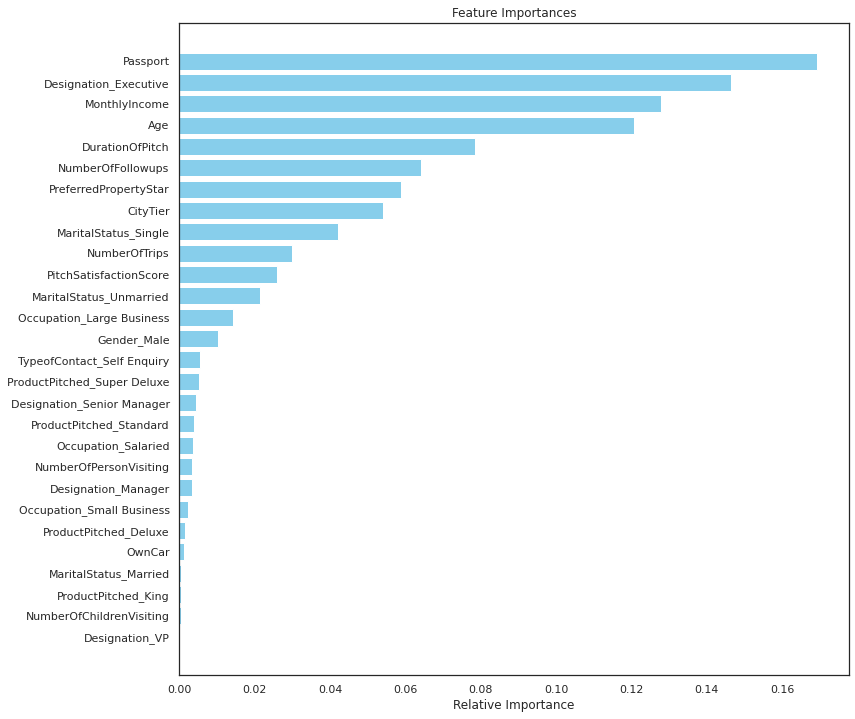

In [ ]:
# Feature Importance
importances_gb = gb.feature_importances_
indices = np.argsort(importances_gb)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances_gb[indices], color="skyblue", align="center")
plt.yticks(range(len(indices)), [attributes[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Result
---


> Decision Tree 

| Score | F-1 Score | AUC |
|---|---|---|
|Before Tuning|	**0.68** |	**0.78** |
|After Tuning | 0.54 |	0.75 |

> Random Forest

| Score | F-1 Score | AUC |
|---|---|---|
|Before Tuning|	**0.67** |	**0.76** |
|After Tuning | 0.53 |	0.72 | 

> Gradient Boosting

| Score | F-1 Score | AUC |
|---|---|---|
|Before Tuning|	**0.48** |	**0.66** |
|After Tuning | 0.55 |	0.70 |

**Top 5 Feature Importance by The Models**

> Decision Tree

1. Age
2. Duration of Pitch
3. Monthly Income
4. Number of Trips
5. Designation (Executives)

> Random Forest

1. Monthly Income
2. Age
3. Duration of Pitch
4. Passport
5. Number of Trips

> Gradient Boosting

1. Passport
2. Designation (Executives)
3. Monthly Income
4. Age
5. Duration of Pitch




## Business Insight and Recommendation
---

Recommendations About Data

1. More data entries with more balanced target
2. Collecting more relevant attributes for better model performance and predicted result (e.g. package price, satisfaction rate after tour)

From data analysis, customer who took the products are mostly :

* Younger customers between age 30 to 40.
* Couples or families with 1-2 children.
* Came from city tier 1.
* Owning car and passport.
* Designated as executives or customers with lower monthly income (with occupation as salaried workers or having small business).
* Took ‘basic’ product and property with star 3 are preferred.
* Self Inquiry type of contact.
* Pitched concisely and effectively between 10 – 15 minutes, and more likely to take the product after about 3-5 follow ups

Business Recommendation

* Travel company can collect more relevant information of customers and do profiling and categorizing customers (such as age category, etc.) to see interest of each customers categories.
* The marketing team can contact specific potential customer (not randomly) and offer individual packages to the specific customer categories to optimize duration of pitch and number of follow ups.
* The company can run various campaigns and offer it to each customers categories to increase sales. Also, travel company can create customer referral program to make company and products more well known (and more data to collect).
* The package should be offered with considering the features importance.
* The data shows customers with passport has higher buying ratio so travel company can curate international packages for such customers, also offering to help customers to make passport could help increasing interest of customers.
* The data collection process can be enhanced to capture additional information like 